# Testing sdRDM based module for IR analysis

In [12]:
from sdRDM import DataModel
import modules.ir_file_handler as ir
from datetime import datetime
import os

## Initializing DataModel

In [13]:
os.chdir("D:/Github/IRAnalysis/")
ir_analysis_lib = DataModel.from_markdown("./specifications")
ir_analysis_lib

Objects IRAnalysis, Experiment, SamplePreparation, Measurement, Analysis, Calculation,
        Result, Dataset, Series
Enums   MeasurementTypes

In [14]:
ir_analysis_root = ir_analysis_lib.IRAnalysis(
    datetime_created = str(datetime.now()),
    datetime_modified = str(datetime.now())
)
ir_analysis_root.add_to_experiment(name="te")
type(ir_analysis_root)

sdRDM-Library-3.iranalysis.IRAnalysis

## Creating DataModel objects

In [15]:
testing_experiment = ir_analysis_lib.Experiment(name="Testing")
testing_measurement = ir_analysis_lib.Measurement(name="TestingMeasurement")
testing_measurement

Measurement(id='measurement0', name='TestingMeasurement', geometry=None, temperature=None, pressure=None, measurement_type=None, measurement_data=Dataset(id='dataset0', timestamp=None, x_axis=Series(id='series0', data_array=[], unit=None), y_axis=Series(id='series1', data_array=[], unit=None)))

In [16]:
ir_analysis_root.experiment.append(testing_experiment)
ir_analysis_root

IRAnalysis(id='iranalysis0', datetime_created=datetime.datetime(2023, 11, 14, 19, 17, 15, 171040), datetime_modified=datetime.datetime(2023, 11, 14, 19, 17, 15, 171040), contributors=[], experiment=[Experiment(id='experiment0', name='te', sample_preparation=None, measurements=[], analysis=[], results=None), Experiment(id='experiment1', name='Testing', sample_preparation=None, measurements=[], analysis=[], results=None)])

### Loading measurement data into the DataModel

In [17]:
path_to_measurement = "D:/Downloads/IR_sample_data/"
datamodel_directory = "D:/Github/IRAnalysis/"
MeasurementFiles = ir.IRDataFiles(path_to_measurement,
                                  datamodel_directory=datamodel_directory, 
                                  extension="csv", 
                                  experiment_name="NamedExperiment")
MeasurementFiles.files

['TO.P123.5_5h-450C.CSV',
 'TO_P123_5_360min-450C_30min-4mbar-Pyr-RT_30min-300C-Pyr-des.CSV',
 'TO_P123_5_360min-450C_30min-4mbar-Pyr-RT_30min-350C-Pyr-des.CSV',
 'TO_P123_5_360min-450C_30min-4mbar-Pyr-RT_30min-400C-Pyr-des.CSV',
 'TO_P123_5_360min-450C_30min-4mbar-Pyr-RT_30min-450C-Pyr-des.CSV',
 'TO_P123_5_360min-450C_30min-4mbar-Pyr-RT_60min-150C-Pyr-des.CSV',
 'TO_P123_5_360min-450C_30min-4mbar-Pyr-RT_60min-200C-Pyr-des.CSV',
 'TO_P123_5_360min-450C_30min-4mbar-Pyr-RT_60min-250C-Pyr-des.CSV']

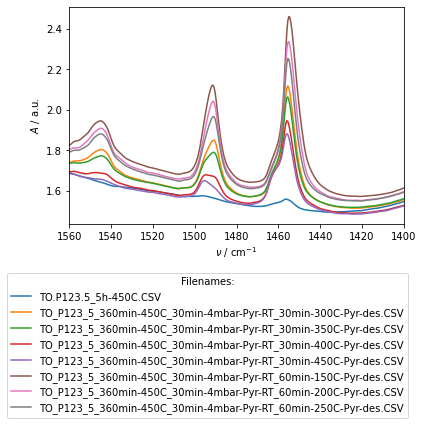

In [18]:
MeasurementFiles.show_data(wavenumber_region=(1560,1400), legend=True)

In [19]:
print(MeasurementFiles.datamodel)

IRAnalysis
├── id = iranalysis1
├── datetime_created = 2023-11-14 19:17:15.250827
└── experiment
    └── 0
        └── Experiment
            ├── id = experiment2
            ├── name = NamedExperiment
            └── measurements
                ├── 0
                │   └── Measurement
                │       ├── id = measurement1
                │       ├── name = TO.P123.5_5h-450C.CSV
                │       └── measurement_data
                │           └── Dataset
                │               ├── id = dataset2
                │               ├── x_axis
                │               │   └── Series
                │               │       ├── id = series0
                │               │       └── data_array = [799.8316, 800.3137, 800.7958, 801.278, 801.7601, ...]
                │               └── y_axis
                │                   └── Series
                │                       ├── id = series1
                │                       └── data_array = [0.9822274

In [23]:
MeasurementFiles.set_background(["TO.P123.5_5h-450C.CSV"])
print(MeasurementFiles._datamodel)

IRAnalysis
├── id = iranalysis1
├── datetime_created = 2023-11-14 19:17:15.250827
└── experiment
    └── 0
        └── Experiment
            ├── id = experiment2
            ├── name = NamedExperiment
            └── measurements
                ├── 0
                │   └── Measurement
                │       ├── id = measurement1
                │       ├── name = TO.P123.5_5h-450C.CSV
                │       ├── measurement_type = Background
                │       └── measurement_data
                │           └── Dataset
                │               ├── id = dataset2
                │               ├── x_axis
                │               │   └── Series
                │               │       ├── id = series0
                │               │       └── data_array = [799.8316, 800.3137, 800.7958, 801.278, 801.7601, ...]
                │               └── y_axis
                │                   └── Series
                │                       ├── id = series1
         

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
callmemaybe = lambda x: x^2
print(callmemaybe)

<function <lambda> at 0x0105B148>
